# A1: Neuron Models

## Prelims

In [7]:
import numpy as np
import matplotlib.pyplot as plt

import neuron_models as nm
import ans as ans

# These next two lines automatically reload the imports if they are changed.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Q3: Two LIF Neurons

## (a)

In [8]:
#=========== YOUR CODE (start) ===========
#YOUR CODE HERE
LIF_A = ans.LIFNeuron(Tau_m=0.02, Tau_ref=0.01, Tau_s=0.06, label='LIF A')
LIF_B = ans.LIFNeuron(Tau_m=0.02, Tau_ref=0.01, Tau_s=0.06, label='LIF B')
InA = nm.InputNeuron( nm.generate_spike_train( [[0,0], [1.2,50], [1.3,0]] ), label='InA')
InB = nm.InputNeuron( nm.generate_spike_train( [[0,40], [0.1,0]] ), label='InB')

net = nm.SpikingNetwork()   # Create network
net.add_neuron(LIF_A)
net.add_neuron(LIF_B)
net.add_neuron(InA)
net.add_neuron(InB)

InA.connect_to(LIF_A, -0.6)
InB.connect_to(LIF_B, 0.3)
LIF_A.connect_to(LIF_B, 0.07)
LIF_B.connect_to(LIF_A, 0.07)

#=========== YOUR CODE (end) ===========

## (b)

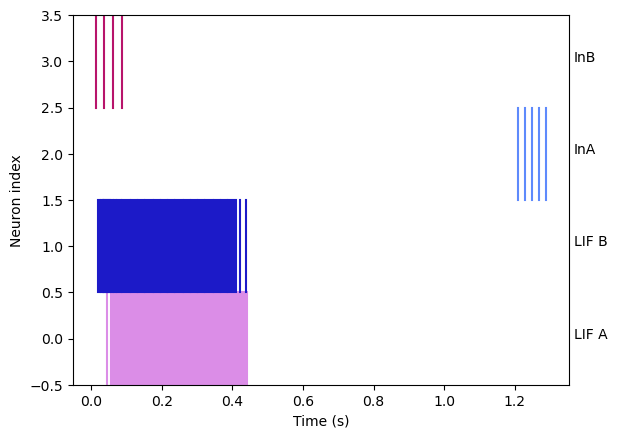

In [9]:
#=========== YOUR CODE (start) ===========
#YOUR CODE HERE

net.simulate(2, 0.001)
net.spike_raster()
#=========== YOUR CODE (end) ===========

# Q4: LIF Firing Rate Experiment

## (a)

In [10]:
#=========== YOUR CODE (start) ===========
#YOUR CODE HERE
InA = nm.InputNeuron( nm.generate_spike_train( [[0,20],[2,0]] ), label='InA')

net = nm.SpikingNetwork()   # Create network
net.add_neuron(InA)

N = 50

for i in range(N+1):
    ni = ans.LIFNeuron(Tau_m=0.01, Tau_ref=0.005, Tau_s=0.3, label='LIF '+str(i))
    net.add_neuron(ni)
    w = (3*i) / (20*N)
    InA.connect_to(ni, w)
    
#=========== YOUR CODE (end) ===========

## (b)

In [11]:
#=========== YOUR CODE (start) ===========
#YOUR CODE HERE
net.simulate(2, 0.001)

avg = [0.]*(N+1)

for i in range(N+1):
    avg[i] = nm.spikes_between(net.neur[i+1].get_spikes(), t_start=1., t_end=2.)
    
print(avg)
#=========== YOUR CODE (end) ===========

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 27, 36, 39, 42, 44, 45, 46, 47, 47, 48, 49, 48, 47, 48, 46, 45, 44, 44, 42, 41, 40, 38, 37, 35, 33, 32, 29, 27, 26, 23, 21, 19, 16]


## (c)

Text(0.5, 1.0, 'Input current vs Firing rate')

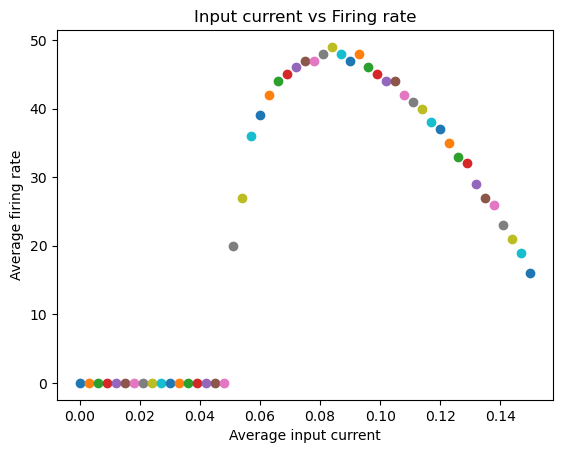

In [12]:
#=========== YOUR CODE (start) ===========
#YOUR CODE HERE
for i in range(N+1):
    w = (3*i) / (20*N)
    plt.plot(w,avg[i],'o')
plt.xlabel('Average input current')
plt.ylabel('Average firing rate')
plt.title('Input current vs Firing rate')

#=========== YOUR CODE (end) ===========